___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data



### The Imports



In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [2]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,1,1)
BAC = data.DataReader('BAC','yahoo',start,end)
C = data.DataReader('C','yahoo',start,end)
GS = data.DataReader('GS','yahoo',start,end)
JPM = data.DataReader('JPM','yahoo',start,end)
MS = data.DataReader('MS','yahoo',start,end)
WFC = data.DataReader('WFC','yahoo',start,end)


In [3]:
C.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,358.130615
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870960.0,351.518829
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143160.0,353.262573
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370210.0,353.262573
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680740.0,351.591492


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [4]:
tickers = 'BAC C GS JPM MS WFC'.split()

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.

In [5]:
bank_stocks=pd.concat([BAC, C, GS,JPM,MS,WFC], axis=1, keys=tickers)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.364235   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.009903   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.052433   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.002827   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.024075   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  35.224972  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  35.249138  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.345783  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  35.382023  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  35.756565  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.104460  
2006-01-04  31.530001  10870000.0  19.871264  
2006-01-05  31.495001  10158000.0  19.849205  
2006-01-06  31.680000   8403800.0  19.965805  
2006-01-09  31.674999   5619600.0  19.962650  

[5 rows x 36 columns]

** Set the column name levels:**

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [7]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364235  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.009903  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.052433  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.002827  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.024075  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.224972  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.249138  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.345783  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.382023  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.756565  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.104460  
2006-01-04   31.799999  31.530001  10870000.0  19.871264  
2006-01-05   31.500000  31.495001  10158000.0  19.849205  
2006-01-06   31.580000  31.680000   8403800.0  19.965805  
2006-01-09   31.674999  31.674999   5619600.0  19.962650  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit!

** What is the max Close price for each bank's stock throughout the time period?**

In [8]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns=pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [10]:
for tick in tickers:
    returns[tick+' Return']=bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

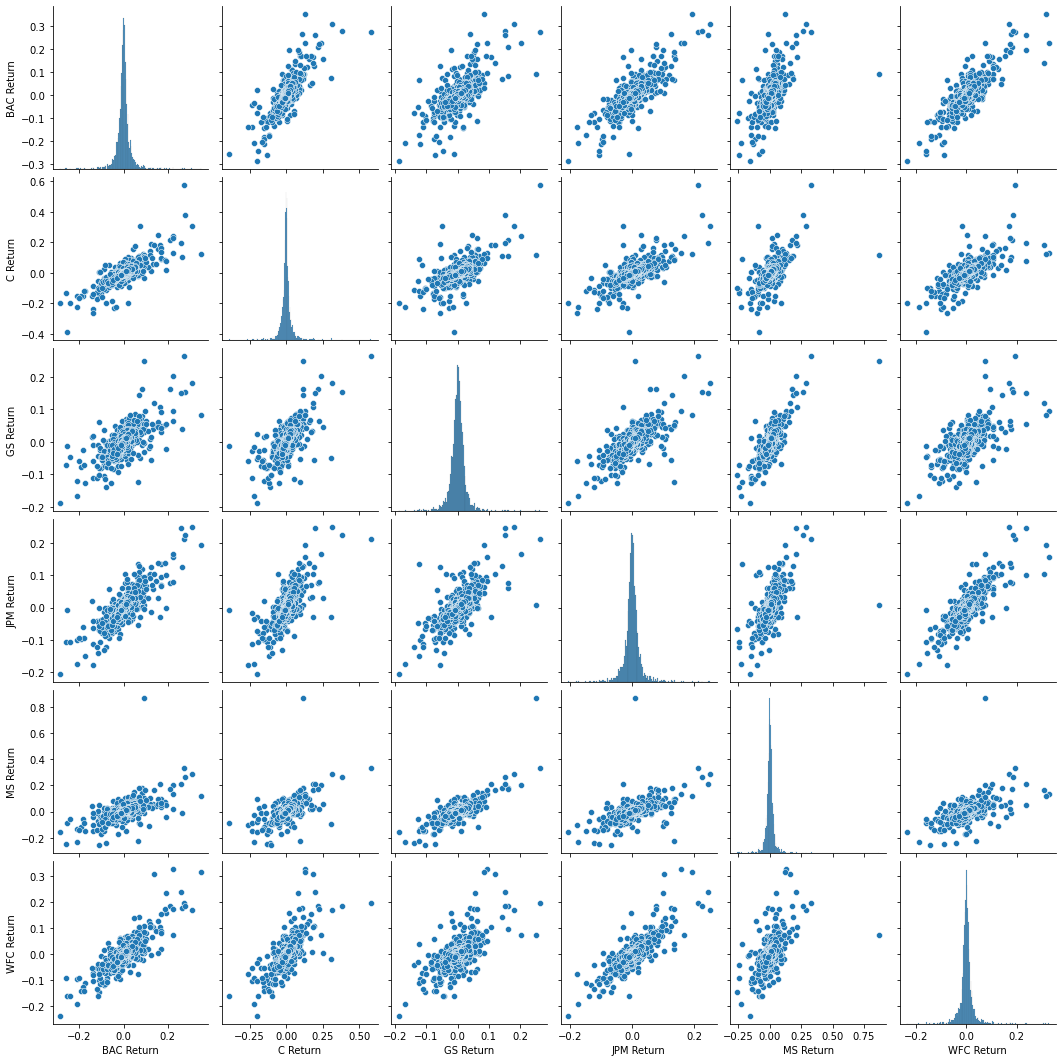

In [11]:
sns.pairplot(returns[1:])

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. 

In [12]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [13]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [14]:
returns.std()
# Citigroup riskiest

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [15]:
returns.loc['2015-01-01':'2015-12-31'].std()
# Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

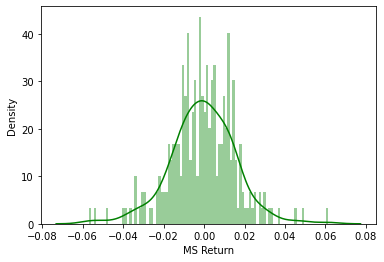

In [16]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31', 'MS Return'],color='green', bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

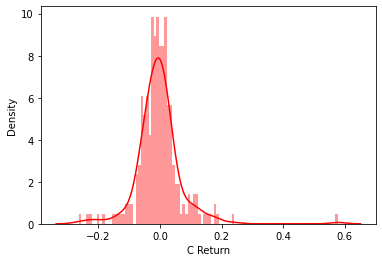

In [17]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31', 'C Return'],color='red', bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

matplotlib.axes._subplots.AxesSubplot

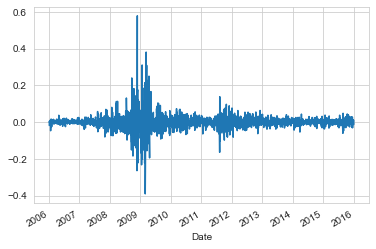

In [23]:
type(returns['C Return'].plot())

** Create a line plot showing Close price for each bank for the entire index of time. 

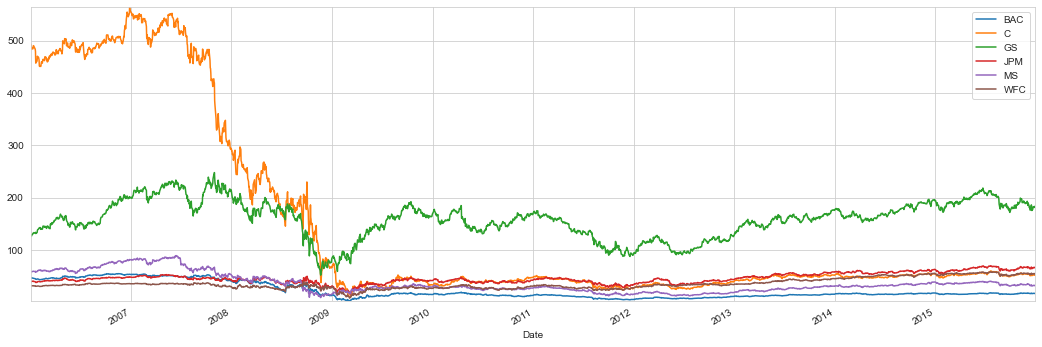

In [24]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(18,6), label=tick)
plt.legend()
plt.margins(0)
    

<AxesSubplot:xlabel='Date'>

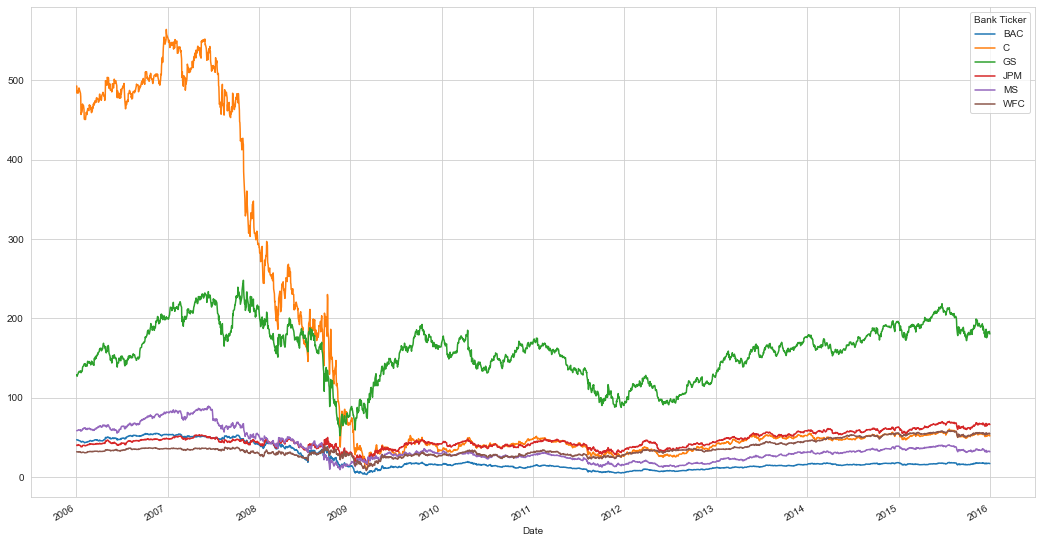

In [25]:
bank_stocks.xs('Close',axis=1,level='Stock Info').plot(figsize=(18,10))

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

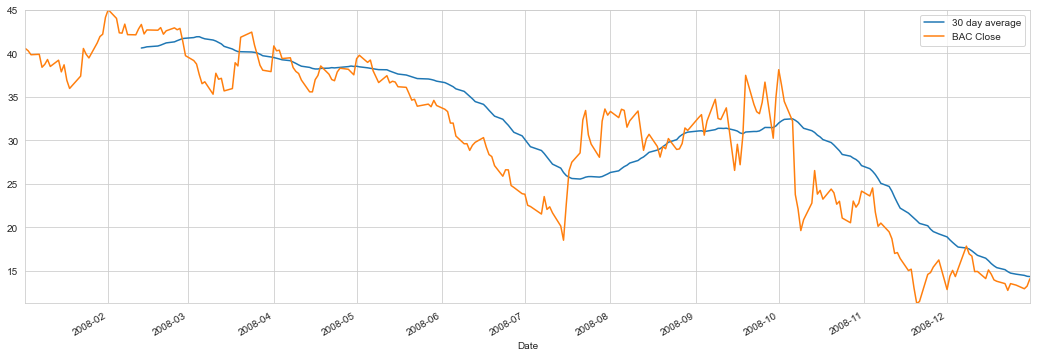

In [26]:
plt.figure(figsize=(18,6))
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 day average')
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(label='BAC Close')
plt.legend()
plt.margins(0)

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

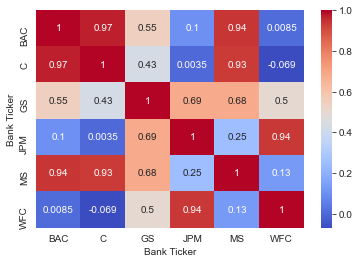

In [27]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True, cmap='coolwarm')

** Use seaborn's clustermap to cluster the correlations together:**

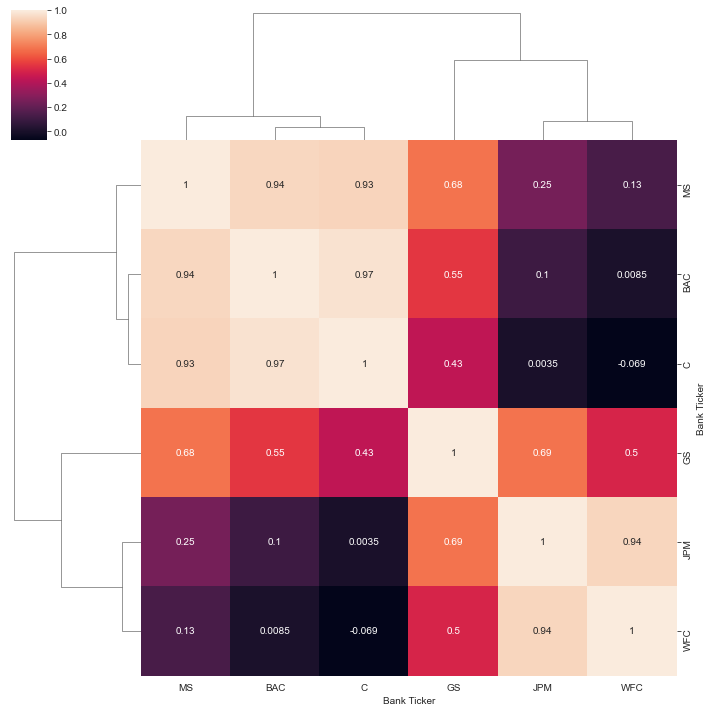

In [28]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)